## QHBayes Example 1

## Inference of Mass Eruption Rate from a single observation of Plume Height using Mastin's data set

In this example, we illustrate how QHBayes can be used to generate plausible estimates of the Mass Eruption Rate (MER) from an observation of the plume height (H) using Mastin's data set.

We will import the data and take a quick look at it.  We will then specify the independent (explanatory) and dependent (output) variables, and set an observation.  Estimates will be generated by drawing samples from the posterior predictive distribution.

First, we import QHBayes package (and numpy for numerical data, matplotlib for plotting)

In [1]:
import qhbayes as qh
import numpy as np
import matplotlib.pyplot as plt

The QHBayes packages includes four data sets; those of Sparks, Mastin, and Aubry, and the IVESPA data.  Here we will use Mastin's data:

In [2]:
Mastin = qh.Mastin

The object <code>Mastin</code> is an instance of the <code>QHstats</code> class within QHBayes:

In [3]:
print(Mastin)

QHstats object with 35 entries


The <code>QHstats</code> object, <code>Mastin</code>, contains the data in the Mastin dataset and methods to perform statistical analysis on this data.

We can explore the data set as a pandas dataframe:

In [18]:
Mastin.data

,Name,Volcano,Latitude,Longitude,Climate zone,Date of onset,Magma type,VEI,Height lower bound,Height upper bound,...,Height method,Volume lower bound,Volume upper bound,Volume,MER lower bound,MER upper bound,MER,Duration lower bound,Duration upper bound,Duration
0,"St. Helens, March 2005",St. Helens,46.200,-122.180,Temperate,3/8/2005,dacite,2,NaN,NaN,...,visual,NaN,NaN,0.0001,NaN,NaN,400000,NaN,NaN,0.50
1,"St. Helens, July 1980",St. Helens,46.200,-122.180,Temperate,7/22/1980,dacite,2,NaN,NaN,...,radar,NaN,NaN,0.0010,NaN,NaN,1400000,NaN,NaN,0.45
2,"St. Helens, 25 May 1980",St. Helens,46.200,-122.180,Temperate,5/25/1980,dacite,3,NaN,NaN,...,radar,NaN,NaN,0.0160,NaN,NaN,20000000,0.0,0.5,0.50
3,St. Helens,St. Helens,46.200,-122.180,Temperate,6/12/1980,dacite,3,NaN,NaN,...,radar,NaN,NaN,0.0170,NaN,NaN,20000000,NaN,NaN,0.50
4,"Pinatubo, Philippines, 12 June 1991",Pinatubo,15.130,120.350,Tropical,6/12/1991,dacite,3,NaN,NaN,...,radar,NaN,NaN,0.0056,NaN,NaN,6000000,NaN,NaN,0.63
5,"Ruapehu, NZ",Ruapehu,-39.280,175.570,Subtropics,6/17/1996,andesite,3,NaN,NaN,...,satellite,NaN,NaN,0.0020,NaN,NaN,200000,NaN,NaN,6.50
6,"Redoubt, USA",Redoubt,60.485,-152.742,Cold,12/15/1989,andesite,3,NaN,NaN,...,visual,NaN,NaN,0.0080,4000000.0,7000000.0,5500000,NaN,NaN,1.03
7,"Nevado del Ruiz, Colombia",Nevado del Ruiz,4.892,-75.324,Tropical,11/13/1985,"andesite, dacite",3,NaN,NaN,...,isopleth,NaN,NaN,0.0140,NaN,NaN,30000000,NaN,NaN,0.30
8,"Spurr, USA, June 1992",Spurr,61.299,-152.251,Cold,6/27/1992,andesite,3,NaN,NaN,...,radar,NaN,NaN,0.0120,NaN,NaN,2000000,NaN,NaN,4.40
9,"Spurr, USA, August 1992",Spurr,61.299,-152.251,Cold,8/18/1992,andesite,3,NaN,NaN,...,radar,NaN,NaN,0.0140,NaN,NaN,3000000,NaN,NaN,3.50


Additionally, methods for the pandas dataframe can be called.  For example, we can plot the data using tools from pandas.DataFrame.plot.

As an example, we can produce a scatter plot the mass eruption rate (contained in the 'MER' column of the dataframe) and the plume height (contained in the 'Plume height' column):

<AxesSubplot:xlabel='MER', ylabel='Plume height'>

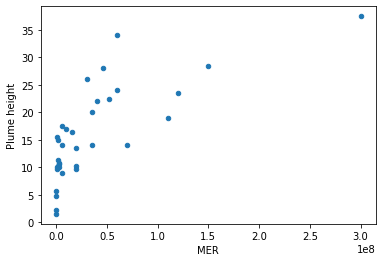

In [5]:
Mastin.data.plot.scatter(x='MER', y='Plume height')

Interesting... but the linear scale for the MER-axis is not helping here.  Perhaps we should re-plot with a logarithmic scale for MER:

<AxesSubplot:xlabel='MER', ylabel='Plume height'>

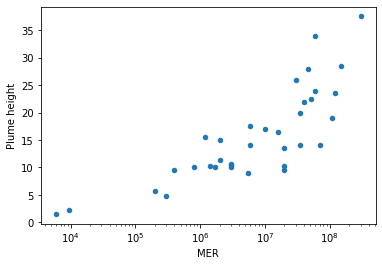

In [6]:
Mastin.data.plot.scatter(x='MER', y='Plume height', logx=True)

Now a very clear relationship appears.  The plume height increases with the MER, and it looks like a power-law relationship would describe this, i.e. $H = a \times Q^{b}$ for some values of $a$ and $b$.

This power-law relationship is expected from dimensional reasoning and from theoretical analysis of the fluid mechanics for turbulent plumes.

We can find the values of $a$ and $b$ using linear regression of logarithmically transformed data.  Taking logarithms we find a linear relationship, $\log H = \log a + b\log Q$, so finding the slope and intercept of the data on a log-log plot would give a prediction of connection between plume height and mass eruption rate.  (The plot below shows Mastin's data on log-log scales, and a straight-line fit looks like it would be reasonable.)

<AxesSubplot:xlabel='MER', ylabel='Plume height'>

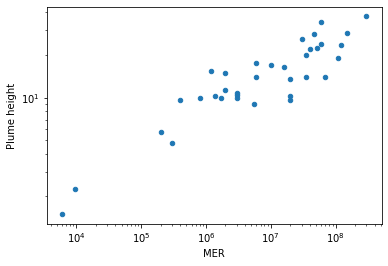

In [7]:
Mastin.data.plot.scatter(x='MER', y='Plume height', logx=True, logy=True)

In QHBayes, we use the logarithmic transformation of the data to look for the relationship between the plume height and mass eruption rate.  For the in-build <code>Mastin</code> data, the columns in the dataframe corresponding the plume height and mass eruption rate have been assigned, and can be found using <code>height_column</code> and <code>mer_column</code> attributes of the <code>QHstats</code> object.

In [8]:
print(f"MER data is in the column called '{Mastin.mer_column}'")
print(f"Plume height data is in the column called '{Mastin.height_column}'")

MER data is in the column called 'MER'
Plume height data is in the column called 'Plume height'


To perform statistical analysis using the Mastin data, we need to specify the 'explanatory' (independent) and 'response' (dependent) variables.  These are often labelled as the $x$ and $y$ variables, and we use this in QHBayes to simplicity.

Most commonly we will want to predict the mass eruption rate from an observation of the plume height.  Thus, we have the $x$ variable as logarithm of the plume height ($x = \log_{10} H$), and the $y$ variable as the logarithm of the mass eruption rate ($y = \log_{10} Q$).

We specify this for the <code>QHstats</code> object using the <code>set_vars</code> method, where we specify <code>xvar</code> and <code>yvar</code> as either <code>'H'</code> for plume height or <code>'Q'</code> (or <code>'MER'</code>) for the mass eruption rate.

Here we want plume height (<code>'H'</code>) to be the explanatory variable, and predict the mass eruption rate (<code>'Q'</code>) from it, so we specify:

In [9]:
Mastin.set_vars(xvar='H', yvar='Q')

We can then proceed to perform the linear regression of the log-transformed data.  In QHBayes this is done using maximum likelihood estimation, implemented in the <code>mle()</code> method of the <code>QHstats</code> object.

If we pass the optional keyword argument <code>plot=True</code> to the `mle()` method, we recieve a plot of the regression curve through the data:

/home/mark/Documents/Plumes/qhbayes/qhbayes/stats/QHStats.py:244: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  mlefig.show()


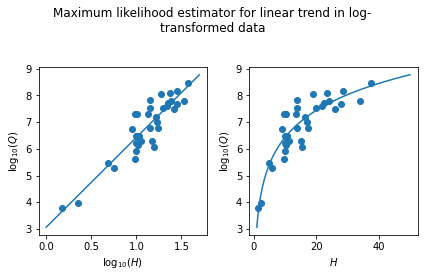

In [10]:
Mastin.mle(plot=True)

The maximum likelihood estimator of the linear regression coefficients in the log-log space produces a nice fit, and gives a good fit of the data in the semi-log space.

### Bayesian linear regression

While the linear regression fits the trend of the data, there remains considerable scatter around the curve.  The amount of scatter can be substantial.  For example, for a plume height of around 10 km, the data spans mass eruption rates between $\sim 5\times 10^{5}$ and $\sim 5\times 10^{7}$ -- two orders of magnitude.

To make meaningful inference of the mass eruption rate from the plume height, it is important to consider the scatter.  With maximum likelihood estimation, we can provide confidence intervals, but a Bayesian approach to linear regression provides other advantages.

In Bayesian linear regression, we propose a model $$y_{i} = \beta_{0} + \beta_{1}x_{i} + \epsilon_{i}$$ (recalling $y_{i}=\log_{10} Q_{i}$, $x_{i} = \log_{10} H_{i}$, so $Q=10^{\beta{0}} H^{\beta{1}}$) where $\epsilon_{i}$ is a model error term that is included to account for deviation from the straight-line fit.  If we assume the errors are independent and identically distributed, then the error can be modelled as $\epsilon_{i} \sim N(0, \sigma^{2})$, with a constant variance $\sigma^{2}$.  Our goal is to determine the model parameters $\mathbf{\beta} = (\beta_{0},\beta_{1})$ and $\sigma^{2}$.  In Bayesian linear regression, we specify priors on the model parameters, and it is common to take a non-informative prior of the form $$p(\mathbf{\beta},\sigma^{2}) \propto 1/\sigma^{2}.$$  Posterior distributions for the model parameters are found using Bayes' theorem, using the data and prior.

In QHbayes, the inference of the model parameters is performed when the variables are specified (i.e. when the `set_vars()` method is called for a dataset).

We can use these to make predictions of the response variable given an observation of the explanatory variable while accounting for the uncertainty in the dataset.  This is known as *Bayesian posterior prediction*.

### Bayesian posterior prediction for mass eruption rate

The posterior predictive distribution can be visualized using the method `posterior_plot()` on the `QHstats` object:


/home/mark/Documents/Plumes/qhbayes/qhbayes/stats/QHStats.py:740: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ppcfig.show()


<AxesSubplot:xlabel='Plume height $H$ (km)', ylabel='Mass Eruption Rate $MER$ (kg/s)'>

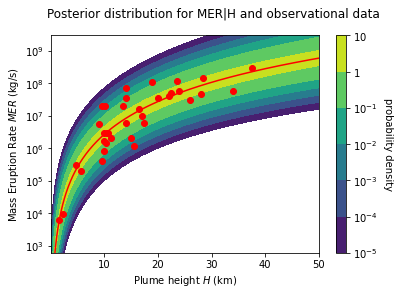

In [11]:
Mastin.posterior_plot()

Here we see the observational data and regression curve found by maximum likelihood estimation.  Additionally, for each plume height, we determine the posterior predictive distribution of the mass eruption rate, and plot these as contours of the probability density.  The contours provide an appropriate envelope of the observations, illustrating the statistical model is appropriate.

Suppose we have an observation of the plume height (in this example taken to be precise) of $H = 10$ km.  We specify this observation by using the `set_obs()` method of the `QHstats` object:  

In [12]:
Mastin.set_obs(10)

We can then draw an estimate of the mass eruption rate from the posterior predictive distribution using the `posterior_simulate()` method of the `QHstats` object:

In [13]:
logQ = Mastin.posterior_simulate(1)

print("Posterior prediction of the mass eruption rate Q = {Q:.3g}".format(Q=10**logQ[0]))

Posterior prediction of the mass eruption rate Q = 1.59e+06


:::{note}
`posterior_simulate` returns the estimates of the logarithm of the response variable.
:::

Running `posterior_simulate()` again will produce a different estimate, as we draw model parameters (including the error term) from their posterior distributions.

In [14]:
logQ_1 = Mastin.posterior_simulate(1)

print("Posterior predictions of the mass eruption rate Q: {Q:.3g}, {Q1:.3g}".format(Q=10**logQ[0], Q1=10**logQ_1[0]))

Posterior predictions of the mass eruption rate Q: 1.59e+06, 3.95e+06


The required positional argument of `posterior_simulate(n)` specifies the number of draws to make from the posterior predictive distribution, and `posterior_simulate` returns a numpy array of length `n` containing the posterior predictive estimates.

As an example, we can draw 10 estimates of the mass eruption rate by setting `n = 10`:

In [15]:
logQ = Mastin.posterior_simulate(10)

Q = 10**logQ

print("Estimates of the mass eruption rate Q | H = 10 km:")
with np.printoptions(precision=3, formatter={'float': '{:0.3g}'.format}):
    print(np.sort(Q))

Estimates of the mass eruption rate Q | H = 10 km:
[3.04e+05 1.41e+06 1.7e+06 2.4e+06 2.97e+06 3.11e+06 4.12e+06 4.4e+06
 6.02e+06 6.21e+06]


It is also possible to return the posterior estimates as a pandas dataframe, by passing the keyword argument `as_dataframe=True` to `posterior_simulate()`:

In [16]:
Mastin.posterior_simulate(10, as_dataframe=True)

,log H,log Q,H,Q
0,1.0,6.845797,10.0,7.011280e+06
1,1.0,6.342560,10.0,2.200694e+06
2,1.0,6.221809,10.0,1.666515e+06
3,1.0,6.181834,10.0,1.519966e+06
4,1.0,6.713109,10.0,5.165458e+06
5,1.0,6.195972,10.0,1.570260e+06
6,1.0,7.104988,10.0,1.273468e+07
7,1.0,6.273816,10.0,1.878521e+06
8,1.0,6.380265,10.0,2.400297e+06
9,1.0,6.596681,10.0,3.950765e+06


It can be useful to visualize these posterior estimates, and `posterior_simulate` has a keyword argument `plot` which, when set to `True`, produces a histogram of the posterior predictive distribution of the response variable.

For example, with 1000 samples drawn, we obtain a useful histogram, showing the range of plausible estimates of the mass eruption rate, and the increased probability around the maximum likelihood.

/home/mark/Documents/Plumes/qhbayes/qhbayes/stats/QHStats.py:441: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  histfig.show()


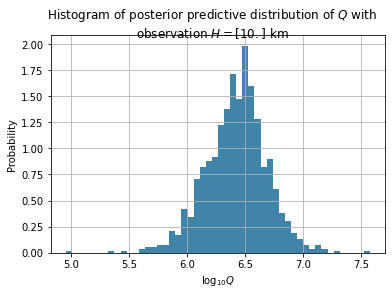

In [17]:
logQ = Mastin.posterior_simulate(1000, plot=True)